#### **Previsão de Vendas Diárias em Pequeno Comércio**


Importação das bibliotecas

In [13]:
!pip install seaborn


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

Configuração de estilo dos plots

In [15]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import seaborn as sns
sns.set_palette("Set2")


Leitura dos dados

In [16]:
df = pd.read_excel("/content/vendas_comercio_local.xlsx")
df['data_venda'] = pd.to_datetime(df['data_venda'])

Visualização inicial

In [17]:
print(df.head())

  data_venda  valor_total  quantidade_vendida categoria_produto  \
0 2024-01-01       439.74                  12           Limpeza   
1 2024-01-02       388.94                   8           Higiene   
2 2024-01-03       451.82                  12         Alimentos   
3 2024-01-04       521.84                  17         Alimentos   
4 2024-01-05       381.27                   8           Limpeza   

     forma_pagamento dia_semana  feriado  promocao  
0                Pix     Monday    False     False  
1                Pix    Tuesday    False     False  
2  Cartão de Crédito  Wednesday    False     False  
3  Cartão de Crédito   Thursday    False     False  
4   Cartão de Débito     Friday    False     False  


### **Análise Exploratória**

Vendas ao longo do tempo

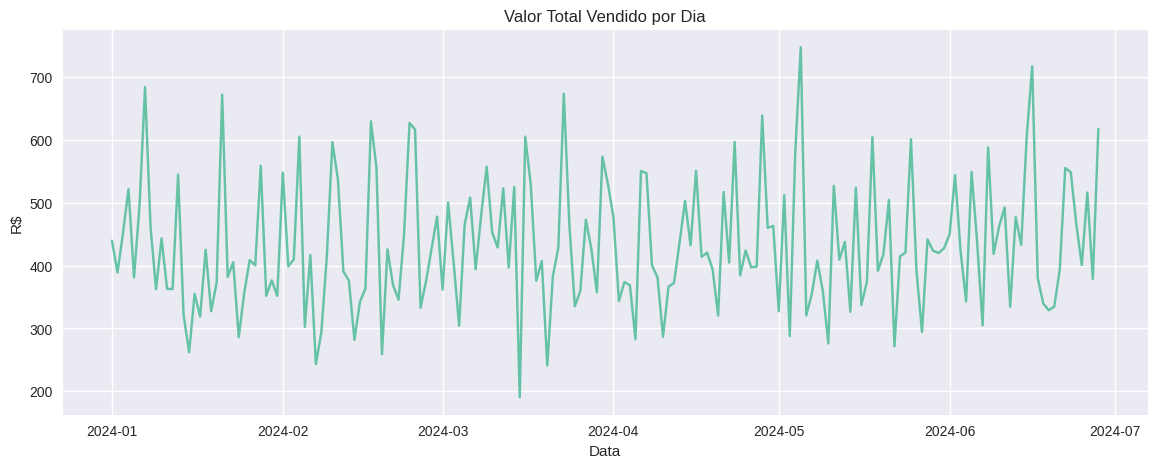

In [18]:
plt.figure(figsize=(14, 5))
plt.plot(df['data_venda'], df['valor_total'])
plt.title('Valor Total Vendido por Dia')
plt.xlabel('Data')
plt.ylabel('R$')
plt.grid(True)
plt.show()

Vendas por dia da semana

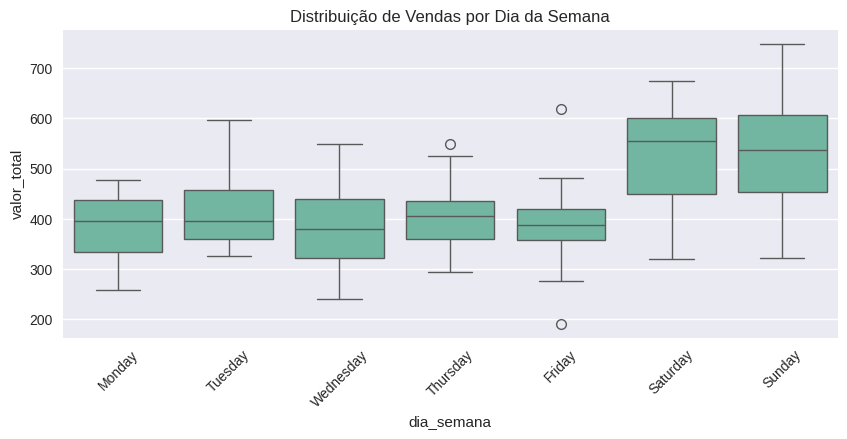

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='dia_semana', y='valor_total', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Distribuição de Vendas por Dia da Semana')
plt.xticks(rotation=45)
plt.show()

### **Preparação dos dados para o Prophet**

In [20]:
df_prophet = df[['data_venda', 'valor_total']].rename(columns={
    'data_venda': 'ds',
    'valor_total': 'y'
})

### **Modelagem com Prophet**

In [21]:
modelo = Prophet()
modelo.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gg689pn/ix9vynsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3gg689pn/gawlvl4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36521', 'data', 'file=/tmp/tmp3gg689pn/ix9vynsz.json', 'init=/tmp/tmp3gg689pn/gawlvl4f.json', 'output', 'file=/tmp/tmp3gg689pn/prophet_modelr308adsz/prophet_model-20250529203639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:36:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Criar datas futuras

In [22]:
futuro = modelo.make_future_dataframe(periods=30)

Fazer previsão

In [23]:
previsao = modelo.predict(futuro)


### **Visualização da Previsão**

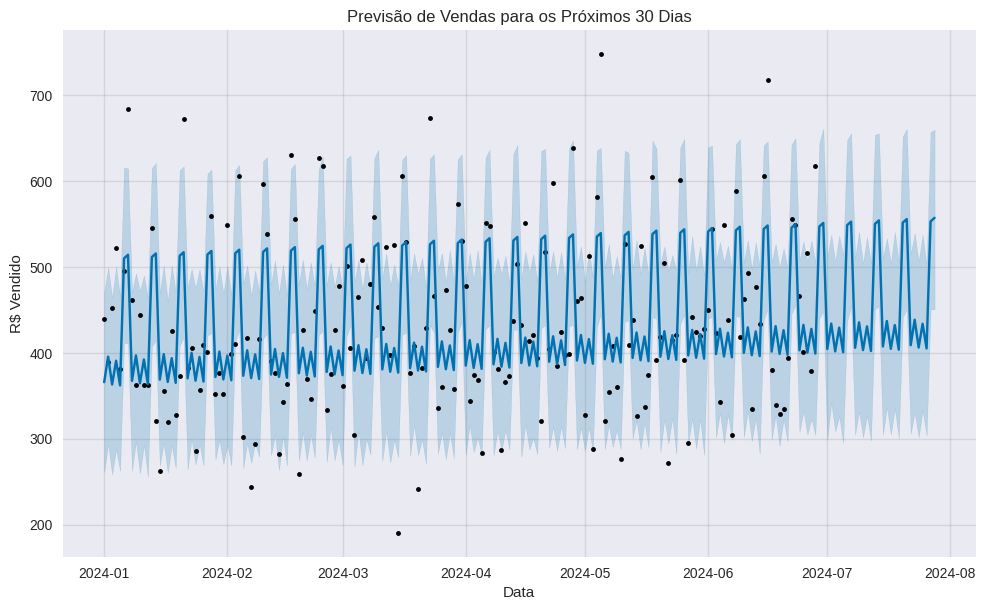

In [24]:
fig1 = modelo.plot(previsao)
plt.title("Previsão de Vendas para os Próximos 30 Dias")
plt.xlabel("Data")
plt.ylabel("R$ Vendido")
plt.show()

### **Exportar previsão**

In [28]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel("previsao_30_dias.xlsx", index=False)
print("Previsão exportada para previsao_30_dias.xlsx")


Previsão exportada para previsao_30_dias.xlsx
